# <center> Classifying flowers

#### Imports and settings

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
import numpy as np
import itertools

%matplotlib inline

data_folder = 'datasets/'

filename = data_folder + 'iris.csv'

### Read and analyse dataset

#### Read file with pandas, isolate X and y

In [2]:
df = pd.read_csv(filename)

X = df[['Sepal length (cm)', 'Sepal width (cm)', 'Petal length (cm)', 'Petal width (cm)']]
y = df['Class']

#### Isolate X and y

In [3]:
df['Sep']

Index([u'Sepal length (cm)', u'Sepal width (cm)', u'Petal length (cm)',
       u'Petal width (cm)', u'Class'],
      dtype='object')

#### Have a look at the data

In [9]:
# Head the frame

df.head()

,Sepal length (cm),Sepal width (cm),Petal length (cm),Petal width (cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# Describe the frame

df.describe()

,Sepal length (cm),Sepal width (cm),Petal length (cm),Petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


[]

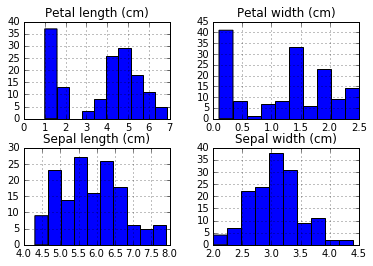

In [12]:
# Hist the values

df.hist()
plt.plot()

### Classify

#### Train a classifier

In [23]:
# Initiate the model

model = DecisionTreeClassifier()
#model = RandomForestClassifier()

In [24]:
# Separate train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
# Fit on train, predict on test, see performance

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [26]:
X_test.shape

(30, 4)

#### Classification Report & Confusion matrix

In [27]:
print classification_report(y_test, y_pred)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.88      1.00      0.93         7

    avg / total       0.97      0.97      0.97        30



In [28]:
# Method to plot a confusion matrix and overlay numbers
def do_plot_conf_mat(targets_true, 
                     targets_pred,
                     labels=None,
                     normalize=False,
                     cmap=plt.cm.Blues):
    """
    Compute the confusion matrix of a classifier and plot it with overlayed numbers on each cell.
    Conf Mat will have the real targets on the rows and the predicted targets on the columns.
    INPUT:
        - the list of real targets for samples
        - the list of predictes samples for samples
        - the list of labels to be plotted in that order on the cells rows/colums
            * defaults to None, which will put cells in the sorted order of all targets found 
              (all available classes will be used)
            * if list is given, this will automatically adjust cell values to those order 
              because this is what confusion_matrix does automatically.
              In this case, you can pass a list containing only the classes of your interest for the matrix.
        - boolean about whether to normalize matrix (by row) or not (default:False)
        - the map of gradient colours to apply
    OUTPUT:
        - the conf matrix
    NOTEs: 
        * overlayed numbers in the normalised case are printed with 2 decimal digits
        * gradient colourbar on the side will always report non-normalised values
        * If normalised, the diagonal of the conf mat will give the rate of correctly classified samples in each class
    """
    
    # Compute the confusion matrix
    cm = confusion_matrix(targets_true, targets_pred, labels=labels)
    
    # Set the title
    title = 'Confusion Matrix'

    if not labels:
        labels = sorted(list(set(targets_true) & set(targets_pred)))
            
    # Set plotting parameters
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title += ', normalized (by row)'
        
    # this is for overlaying the numbers on cells
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j], 2),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)
    
    plt.show()
    
    return cm

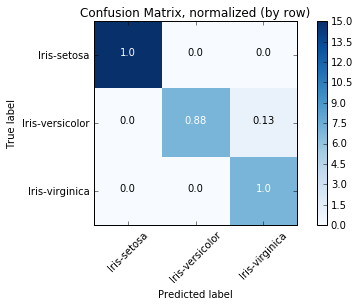

In [29]:
cm = do_plot_conf_mat(y_test, y_pred, normalize=True, labels=None)